In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [27]:
df = pd.read_csv('dataset.csv')
df.drop('sID', axis=1, inplace=True)
df.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [28]:
df.tail()

,Datetime,Count
11851,31-12-2013 19:00,286
11852,31-12-2013 20:00,256
11853,31-12-2013 21:00,228
11854,31-12-2013 22:00,216
11855,31-12-2013 23:00,246


In [29]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 

In [30]:
df = df.resample('D').mean() 
df.tail()

,Count
Datetime,
2013-12-27,161.166667
2013-12-28,128.500000
2013-12-29,97.083333
2013-12-30,205.333333
2013-12-31,202.500000


In [31]:
train=df[0:-29] 
test=df[-30:]

In [32]:
df.shape, train.shape, test.shape

((494, 1), (465, 1), (30, 1))

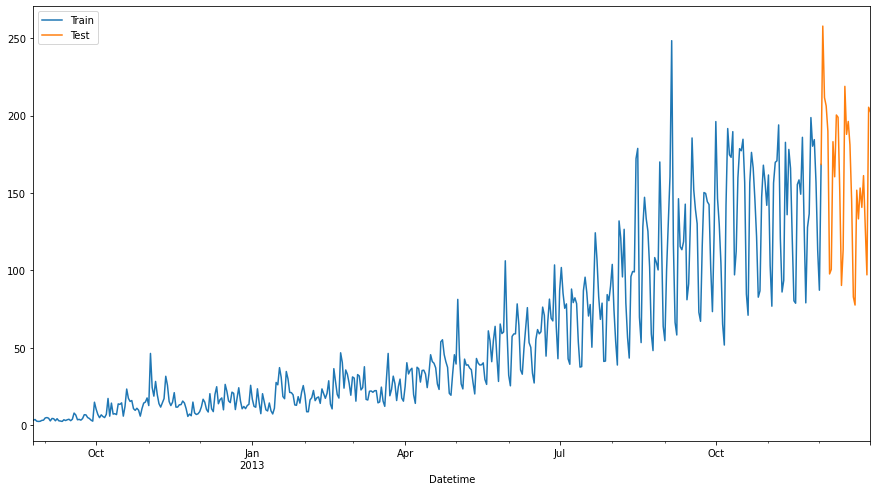

In [33]:
plt.figure(figsize=(15,8))
train['Count'].plot(label='Train')
test['Count'].plot(label= 'Test')
plt.legend(loc='best')
plt.show()

# Naive Approach

![Naive approach formula](./formulas/naive-approach.webp)

In [34]:
prediction_naive = test.copy()
prediction_naive['Count'] = train['Count'].iloc[-1]

In [35]:
def plot_prediction(prediction):
    plt.figure(figsize=(15,8))
    train['Count'].plot(label='Train')
    test['Count'].plot(label='Test')
    prediction['Count'].plot(label='Naive')
    plt.legend(loc='best')
    plt.show()

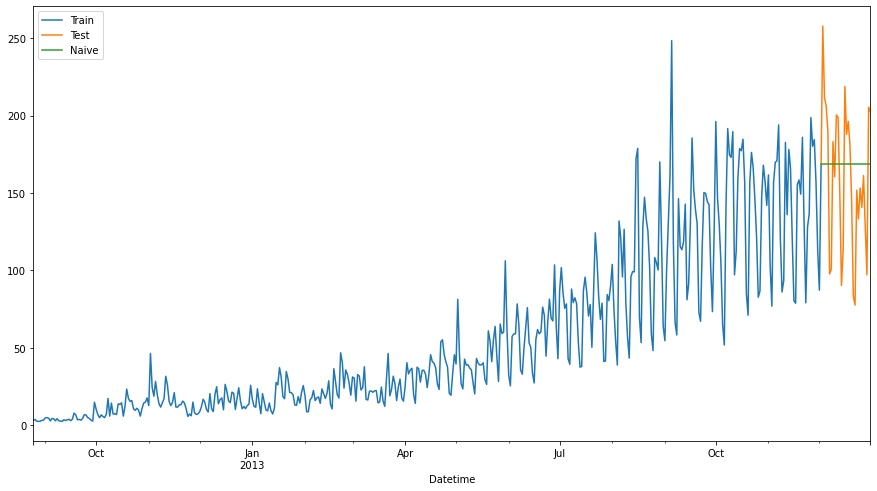

In [36]:
plot_prediction(prediction_naive)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

In [38]:
def calculate_metrics_and_print_results(prediction):
    mae = mean_absolute_error(test['Count'], prediction['Count'])
    print('Mean Absolute Error:', mae)

    mape = mean_absolute_percentage_error(test['Count'], prediction['Count'])
    print('Mean Absolute Percentage Error:', mape)

    mse = mean_squared_error(test['Count'], prediction['Count'])
    print('Mean Squared Error:', mse)

    rmse = sqrt(mean_squared_error(test['Count'], prediction['Count']))
    print('Root Mean Squared Error:', rmse)


In [39]:
calculate_metrics_and_print_results(prediction_naive)

Mean Absolute Error: 38.68333333333333
Mean Absolute Percentage Error: 0.30585606230219764
Mean Squared Error: 2158.5962962962963
Root Mean Squared Error: 46.46069625281455


# Simple Average

![Simple average formula](./formulas/simple-average.png)


In [40]:
prediction_simple_avg = test.copy()
prediction_simple_avg['Count'] = train['Count'].mean()

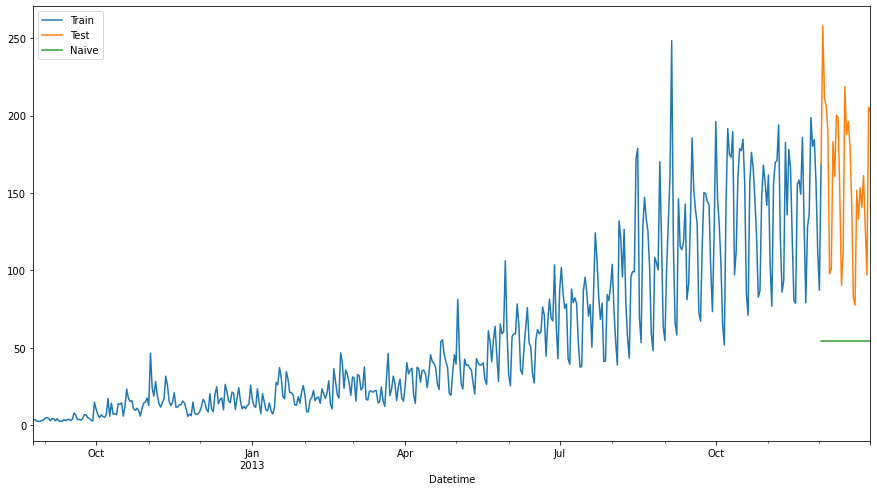

In [41]:
plot_prediction(prediction_simple_avg)

In [42]:
calculate_metrics_and_print_results(prediction_simple_avg)

Mean Absolute Error: 105.07383512544803
Mean Absolute Percentage Error: 0.6223566595490201
Mean Squared Error: 13123.610334142671
Root Mean Squared Error: 114.55832721431764


# Simple Moving Average

![Moving average formula](./formulas/moving-average.webp)


In [43]:
prediction_moving_avg = test.copy()
prediction_moving_avg['Count'] = train['Count'].rolling(30, min_periods=1).mean().iloc[-1]

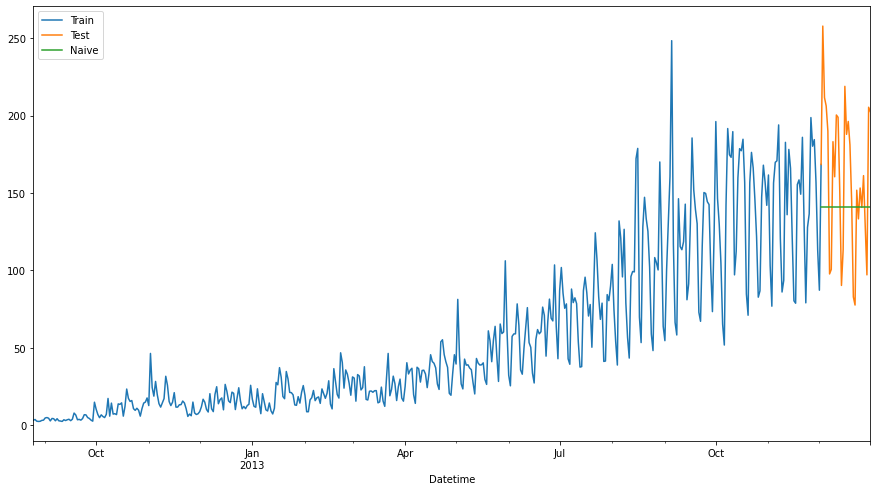

In [44]:
plot_prediction(prediction_moving_avg)

In [45]:
calculate_metrics_and_print_results(prediction_moving_avg)

Mean Absolute Error: 42.03981481481481
Mean Absolute Percentage Error: 0.2779037436816013
Mean Squared Error: 2445.261550925926
Root Mean Squared Error: 49.44958595302822


# Weighted Moving Average

![Weighted moving average formula](./formulas/weighted-moving-average.png)


In [46]:
weights = np.linspace(0.01, 1, 30)

total = 0
for i in weights:
    total = total + i

weights = weights / total

print(weights)

[0.00066007 0.00291339 0.00516672 0.00742005 0.00967338 0.01192671
 0.01418004 0.01643337 0.0186867  0.02094003 0.02319335 0.02544668
 0.02770001 0.02995334 0.03220667 0.03446    0.03671333 0.03896666
 0.04121998 0.04347331 0.04572664 0.04797997 0.0502333  0.05248663
 0.05473996 0.05699329 0.05924661 0.06149994 0.06375327 0.0660066 ]


In [47]:
prediction_weighted_moving_avg = test.copy()
prediction_weighted_moving_avg['Count'] = train['Count'].rolling(30).apply(lambda x: np.sum(weights*x)).iloc[-1]

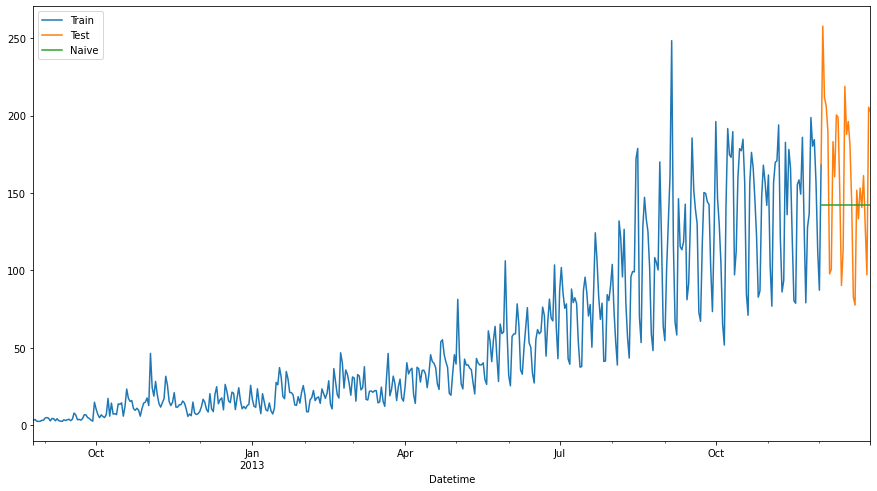

In [48]:
plot_prediction(prediction_weighted_moving_avg)

In [49]:
calculate_metrics_and_print_results(prediction_weighted_moving_avg)

Mean Absolute Error: 41.53140750856695
Mean Absolute Percentage Error: 0.27730286170434204
Mean Squared Error: 2389.53621190894
Root Mean Squared Error: 48.882882606378075


# Simple Exponential Smoothing

![Simple exponential smoothing formula](./formulas/simple-exponential-smoothing.png)

In [50]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [51]:
fit_model = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
prediction_simple_exp_smoothing = test.copy()
prediction_simple_exp_smoothing['Count'] = fit_model.forecast(30)

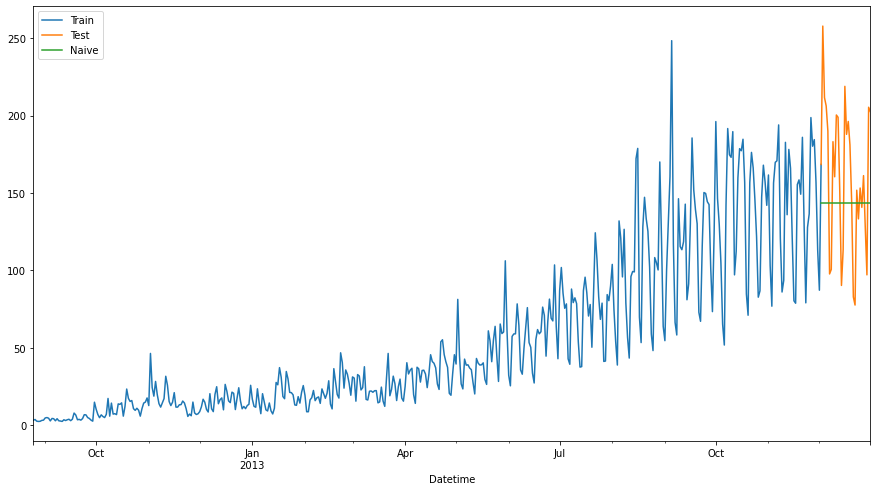

In [52]:
plot_prediction(prediction_simple_exp_smoothing)

In [53]:
calculate_metrics_and_print_results(prediction_simple_exp_smoothing)

Mean Absolute Error: 41.113691299636926
Mean Absolute Percentage Error: 0.27680916671123196
Mean Squared Error: 2347.2330237728206
Root Mean Squared Error: 48.44825098775827


# Double Exponential Smoothing (Holt’s Linear Method)

![Holts linear trend method formula](./formulas/holt-linear.webp)


In [54]:
prediction_holt_linear = test.copy()
fit_model = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.2,smoothing_slope = 0.1)
prediction_holt_linear['Count'] = fit_model.forecast(30)

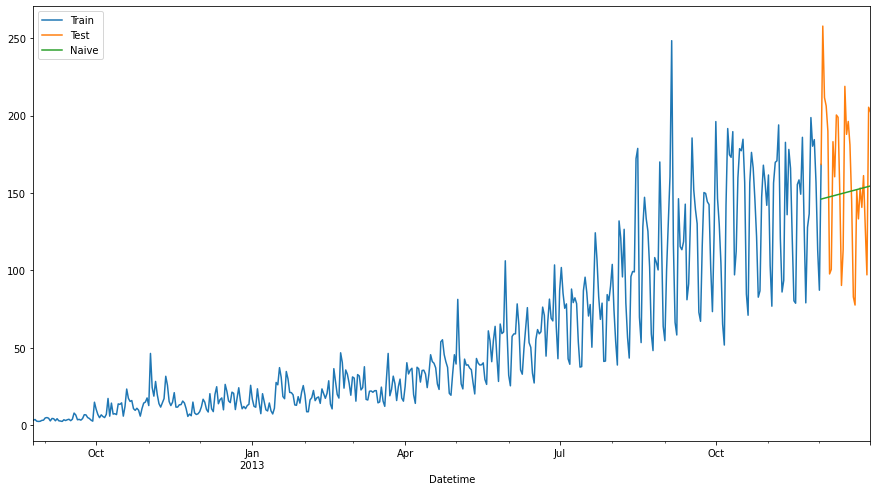

In [55]:
plot_prediction(prediction_holt_linear)

In [56]:
calculate_metrics_and_print_results(prediction_holt_linear)

Mean Absolute Error: 39.88078502013285
Mean Absolute Percentage Error: 0.2808211036505364
Mean Squared Error: 2243.442363386639
Root Mean Squared Error: 47.36499090453453


# Triple Exponential Smoothing (Holt-Winters Method)

![Holts winters method formula](./formulas/holt-winter.webp)


In [57]:
prediction_holt_winter = test.copy()
fit_model = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
prediction_holt_winter['Count'] = fit_model.forecast(30)

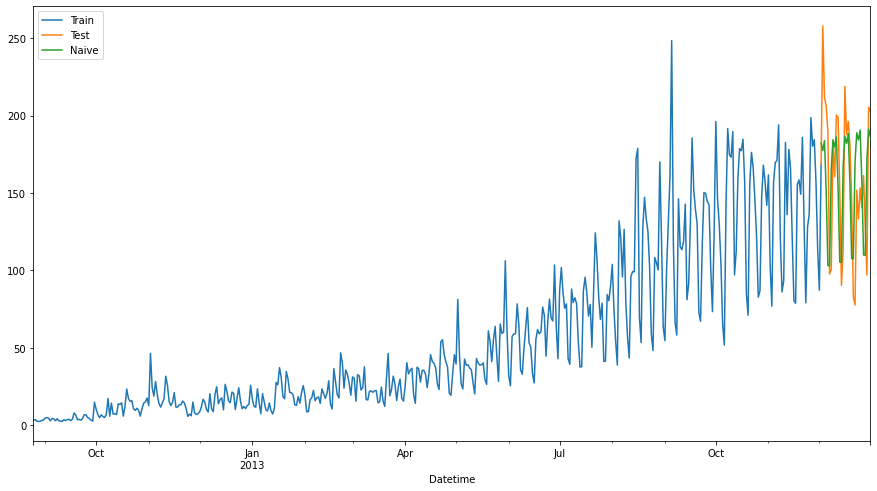

In [58]:
plot_prediction(prediction_holt_winter)

In [59]:
calculate_metrics_and_print_results(prediction_holt_winter)

Mean Absolute Error: 35.755336977653606
Mean Absolute Percentage Error: 0.26019732553394787
Mean Squared Error: 1906.543830244068
Root Mean Squared Error: 43.66398779594081


# Metrics explained

In [60]:
arr = np.array([1, 2, 3, 4])
arr1 = np.array([1, 2, 3, 4])
diff = arr - arr1
mae = np.abs(diff).mean()
print(mae)
mape = np.abs(diff / arr).mean()
print(mape)
mse = (diff ** 2).mean()
print(mse)
rmse = np.sqrt(mse)
print(rmse)

0.0
0.0
0.0
0.0
